In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from main import *
    import dNN
    import visualization as vis
except ImportError:
    print('Module not found')

In [3]:
ada1 = sc.read_h5ad("data/LS_processed.h5ad")
ada1

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [4]:
ada2 = sc.read_h5ad("data/NL_matched.h5ad")
ada2

AnnData object with n_obs × n_vars = 2552 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [5]:
ada1.obs['ident'].value_counts()

APOE+ FIB       1228
FBN1+ FIB        813
TC               765
CD40LG+ TC       630
Inflam. FIB      484
cDC2             294
Inflam. TC       266
COL11A1+ FIB     181
cDC1             121
Inflam. DC        81
NKT               81
LC                67
Name: ident, dtype: int64

In [6]:
ada2.obs['ident'].value_counts()

APOE+ FIB       1215
FBN1+ FIB        548
TC               212
COL11A1+ FIB     196
CD40LG+ TC       166
Inflam. FIB       69
Inflam. TC        44
cDC2              38
NKT               36
LC                20
cDC1               7
Inflam. DC         1
Name: ident, dtype: int64

## LS & NL obj:

In [7]:
# obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)

# obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
#            pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)
# print(obj1)

In [8]:
# obj1 = Xct(ada1, 'Inflam. TC', 'Inflam. FIB', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_TC2FIB_LS', mode = 'full', verbose = True)

obj1 = Xct(ada1, 'Inflam. TC', 'Inflam. FIB', build_GRN = False,
           pcNet_name = 'net_TC2FIB_LS', mode = 'full', verbose = True)

print(obj1)

init an Xct object for interactions from Inflam. TC (266) to Inflam. FIB (484)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from Inflam. TC (266) to Inflam. FIB (484)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [9]:
df1 = obj1.fill_metric()
len(df1)

267

In [10]:
# obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

# obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
#            pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

# print(obj2)

In [11]:
# obj2 = Xct(ada2, 'Inflam. TC', 'Inflam. FIB', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_TC2FIB_NL_matched', mode = 'full', verbose = True)

obj2 = Xct(ada2, 'Inflam. TC', 'Inflam. FIB', build_GRN = False,
           pcNet_name = 'net_TC2FIB_NL_matched', mode = 'full', verbose = True)

print(obj2)

init an Xct object for interactions from Inflam. TC (44) to Inflam. FIB (69)...
loading GRNs...
building correspondence...
init completed.
Xct object for interactions from Inflam. TC (44) to Inflam. FIB (69)
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [12]:
df2 = obj2.fill_metric()
len(df2)

61

In [13]:
#selected LR pairs
candidates1 = obj1.get_candidates(df1)
print(len(candidates1))

candidates2 = obj2.get_candidates(df2)
print(len(candidates2))

267
61


In [14]:
obj1._w.shape, obj2._w.shape

((6000, 6000), (6000, 6000))

In [15]:
counts_np1 = get_counts_np(obj1, obj2)
len(counts_np1), counts_np1[0].shape, counts_np1[1].shape, counts_np1[2].shape, counts_np1[3].shape

(4, (3000, 266), (3000, 484), (3000, 44), (3000, 69))

In [16]:
W = build_W(obj1, obj2)
W.shape

(12000, 12000)

In [19]:
projections, losses = dNN.train_and_project(counts_np1, w = W, dim = 2, steps = 1000, lr = 0.001)

Net(
  (linear1): Linear(in_features=266, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=44, out_features=36, bias=True)
  (linear2): Linear(in_features=36, out_features=9, bias=True)
  (linear3): Linear(in_features=9, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=69, out_features=44, bias=True)
  (linear2): Linear(in_features=44, out_features=11, bias=True)
  (linear3): Linear(in_features=11, out_features=2, bias=True)
)
1 15474.986328125
100 685.8284912109375
200 602.9849853515625
300 577.6171875
400 566.7182006835938
500 561.3934936523438
600 558.519775390625
700 556.8804321289062
800 555.885498046875
900 555.181640625
10

In [20]:
projections.shape

(12000, 2)

In [21]:
projections_split = np.array_split(projections, 2) #return a list of ndarray
projections_split[0].shape, projections_split[1].shape

((6000, 2), (6000, 2))

In [22]:
df_nn1 = nn_aligned_dist(obj1, projections_split[0])
df_nn2 = nn_aligned_dist(obj2, projections_split[1])

df_nn1.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...
computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
SPOCK2_C1S,"(2243, 2688)",0.000002,1,120.071013
TNFSF10_ISLR,"(1426, 1007)",0.000002,2,123.138562
ZFP36L1_LTBP4,"(15, 1186)",0.000002,3,122.969879
SAT1_APCDD1,"(2397, 2715)",0.000003,4,135.696654
GMFG_LTBP4,"(1515, 1186)",0.000004,5,120.134853


In [23]:
df_nn_all = nn_aligned_dist_diff(df_nn1, df_nn2)
#df_nn_all = pd.concat([df_nn1, df_nn2], axis=1) 
df_nn_all

,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff,diff_rank
SH2D2A_RGCC,"(1538, 1618)",0.004121,83447,14.587056,"(1538, 1618)",0.017591,3326946,1.265078e-02,1.814403e-04,1
FOXP3_RGCC,"(2245, 1618)",0.004995,106592,10.813732,"(2245, 1618)",0.018440,3877030,4.684626e-13,1.807420e-04,2
PIDD1_CHRDL1,"(380, 343)",0.020093,6022733,0.000444,"(380, 343)",0.007035,193201,4.585796e+00,1.705313e-04,3
HLA-DRB1_RGCC,"(2962, 1618)",0.003332,65993,29.046058,"(2962, 1618)",0.016290,2684235,3.788490e-02,1.679136e-04,4
HSPA1B_RGCC,"(1275, 1618)",0.003108,61503,26.606206,"(1275, 1618)",0.015949,2545595,4.976351e-02,1.649062e-04,5
...,...,...,...,...,...,...,...,...,...,...
BATF_SORBS2,"(2592, 1589)",0.010222,759591,0.667611,"(2592, 1589)",0.010222,709164,6.727682e-01,4.250073e-17,8999996
EGR1_YPEL1,"(1605, 1999)",0.019596,5224434,0.003093,"(1605, 1999)",0.019596,4968306,2.389659e-13,3.122502e-17,8999997
KLB_YPEL1,"(2464, 1999)",0.019596,5224433,0.003093,"(2464, 1999)",0.019596,4965305,2.389659e-13,3.122502e-17,8999998
IL2RB_CD74,"(557, 2991)",0.002327,47621,19.714583,"(557, 2991)",0.002327,47208,2.173631e+01,1.062518e-17,8999999


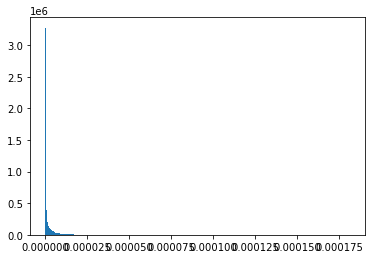

In [24]:
plt.hist(df_nn_all['diff'], bins=1000)
plt.show()

In [27]:
df_enriched_diff = chi2_diff_test(df_nn_all, df=2, FDR=False, candidates=candidates2)
df_enriched_diff


Total enriched: 12 / 9000000


,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff,diff_rank,p_val,enriched_rank
AREG_PTK7,"(2807, 1200)",0.003574,71176,1.886907e+01,"(2807, 1200)",0.011454,1098694,0.463455,0.000062,4390,0.000010,1
AREG_NTRK2,"(2807, 57)",0.002574,51825,2.615952e+01,"(2807, 57)",0.008684,297536,1.095699,0.000037,33949,0.000982,2
VEGFA_FGFR2,"(825, 2307)",0.018279,3887194,1.038846e-02,"(825, 2307)",0.012891,1534913,0.258566,0.000029,76136,0.004575,3
AREG_PDGFRB,"(2807, 1681)",0.001203,29997,5.826822e+01,"(2807, 1681)",0.006140,148552,3.506236,0.000024,126200,0.010861,4
IL13_VEGFA,"(2869, 825)",0.004690,97812,3.024560e+01,"(2869, 825)",0.009037,463042,2.579319,0.000019,213353,0.029986,5
HLA-DMA_CD74,"(2065, 2991)",0.004424,90857,1.004520e+01,"(2065, 2991)",0.008739,300951,1.139461,0.000019,218099,0.031611,6
CD40LG_F3,"(2679, 1216)",0.009975,687896,5.809029e-01,"(2679, 1216)",0.005713,132745,10.143935,0.000018,229458,0.034325,7
GDF11_ACVR2A,"(887, 570)",0.015117,2251740,2.239942e-12,"(887, 570)",0.010914,837889,0.515346,0.000018,243639,0.037698,8
VEGFA_EPHA3,"(825, 2468)",0.019767,5445362,2.453852e-13,"(825, 2468)",0.015581,2388105,0.075756,0.000018,246518,0.038713,9
VEGFA_EPHB4,"(825, 1975)",0.018637,4180827,7.877953e-03,"(825, 1975)",0.014471,1983871,0.111199,0.000017,250760,0.039945,10


In [29]:
Xct.add_names_to_nets(obj1)
Xct.add_names_to_nets(obj2)

completed.
completed.


In [28]:
targets = vis.get_Xct_pairs(df_enriched_diff)
targets

(['AREG', 'PTK7'],
 ['AREG', 'NTRK2'],
 ['VEGFA', 'FGFR2'],
 ['AREG', 'PDGFRB'],
 ['IL13', 'VEGFA'],
 ['HLA-DMA', 'CD74'],
 ['CD40LG', 'F3'],
 ['GDF11', 'ACVR2A'],
 ['VEGFA', 'EPHA3'],
 ['VEGFA', 'EPHB4'],
 ['VEGFA', 'DDR1'],
 ['VEGFA', 'S1PR1'])

identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
merged graphs: 
# of nodes: 42, # of edges: 40
edge from IL13 to VEGFA added


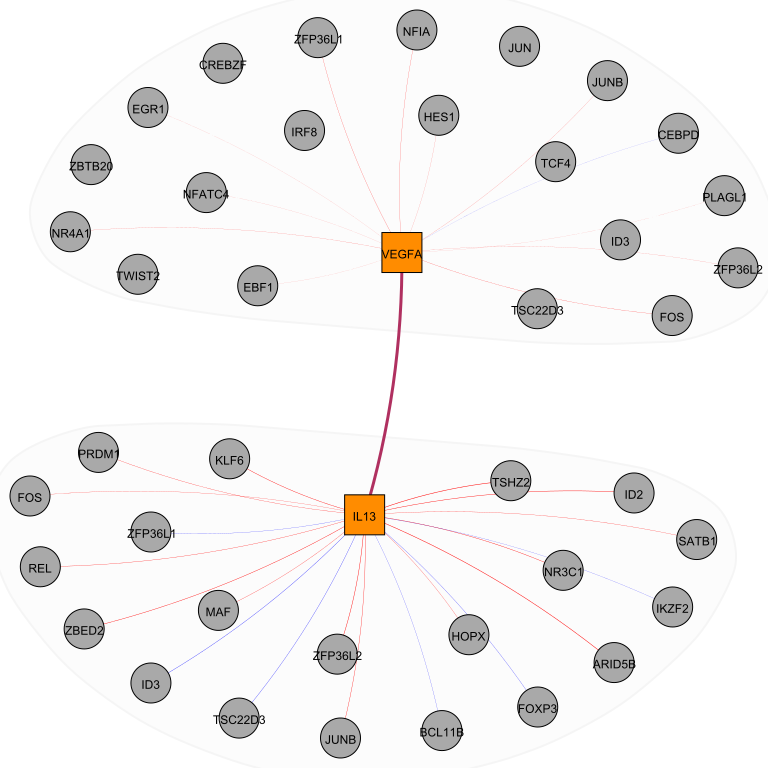

In [32]:
g1 = vis.plot_pcNet(obj1, view='sender', target=[targets[4][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', target=[targets[4][1]], top_edges=20, show = False, verbose = True)
vis.plot_XNet(g1, g2, Xct_pair = [targets[4]], verbose = True)

identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
identified 216 TF(s) along with 1 ligand/receptor target(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20
merged graphs: 
# of nodes: 42, # of edges: 40
edge from IL13 to VEGFA added


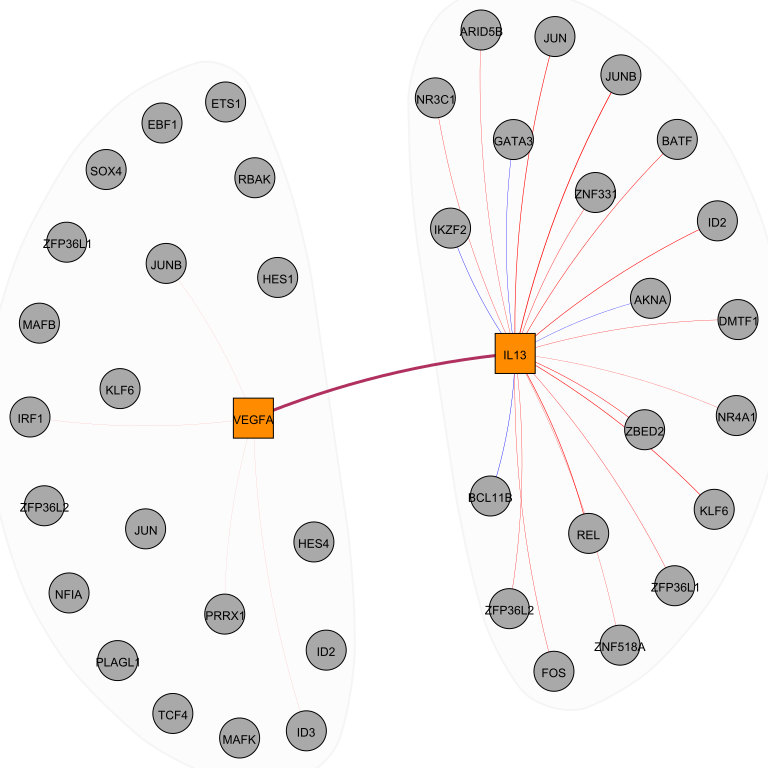

In [33]:
g1 = vis.plot_pcNet(obj2, view='sender', target=[targets[4][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj2, view='receiver', target=[targets[4][1]], top_edges=20, show = False, verbose = True)
vis.plot_XNet(g1, g2, Xct_pair = [targets[4]], verbose = True)